In [3]:
n = int(input("Enter a number: "))
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True
print(is_prime(n))

Enter a number:  21


False


In [4]:
n = int(input("Enter a number: "))
sum = 0
while n > 0:
    sum += n % 10
    n //= 10
print("Sum of digits:", sum)

Enter a number:  12


Sum of digits: 3


In [5]:
import math
a = int(input("Enter first number: "))
b = int(input("Enter second number: "))
gcd = math.gcd(a, b)
lcm = abs(a * b) // gcd
print("GCD:", gcd)
print("LCM:", lcm)

Enter first number:  4
Enter second number:  7


GCD: 1
LCM: 28


In [7]:
t = input("Enter the elements:")
r = list(map(int, t.split()))
start = 0
end = len(r) - 1

while start < end:
    r[start], r[end] = r[end], r[start]
    start += 1
    end -= 1
print("Reversed list:", r)

Enter the elements: 1 2 3 4 5


Reversed list: [5, 4, 3, 2, 1]


In [8]:
s = list(map(int, input("Enter numbers: ").split()))
print("Sorted list:", sorted(s))

Enter numbers:  1 5 2 7 3


Sorted list: [1, 2, 3, 5, 7]


In [9]:
lst = list(map(int, input("Enter numbers: ").split()))
unique = []

for num in lst:
    if num not in unique:
        unique.append(num)

print("List without duplicates:", unique)

Enter numbers:  2 5 7 4 7


List without duplicates: [2, 5, 7, 4]


In [10]:
w = input("Enter a string:")
count = 0
for char in w:
    count += 1
print("Length of the string:", count)

Enter a string: Hazara


Length of the string: 6


In [11]:
s = input("Enter a string: ")
vowels_set = {'a', 'e', 'i', 'o', 'u'}
vowels = 0
consonants = 0
for char in s.lower():
    if char in vowels_set:
        vowels += 1
    else:
        consonants += 1
print("Vowels:", vowels)
print("Consonants:", consonants)

Enter a string:  Hello there


Vowels: 4
Consonants: 7


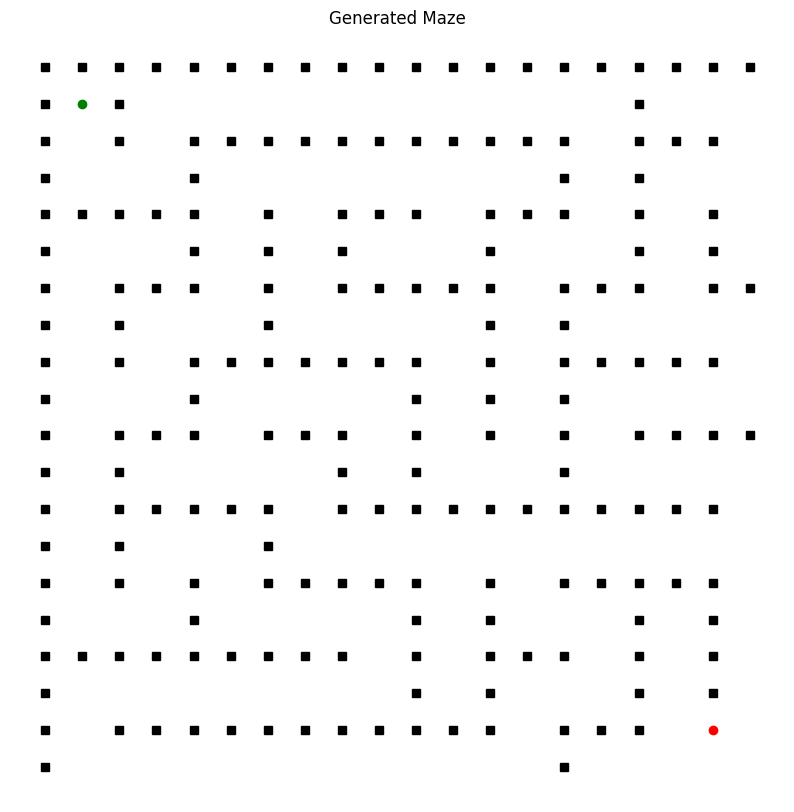

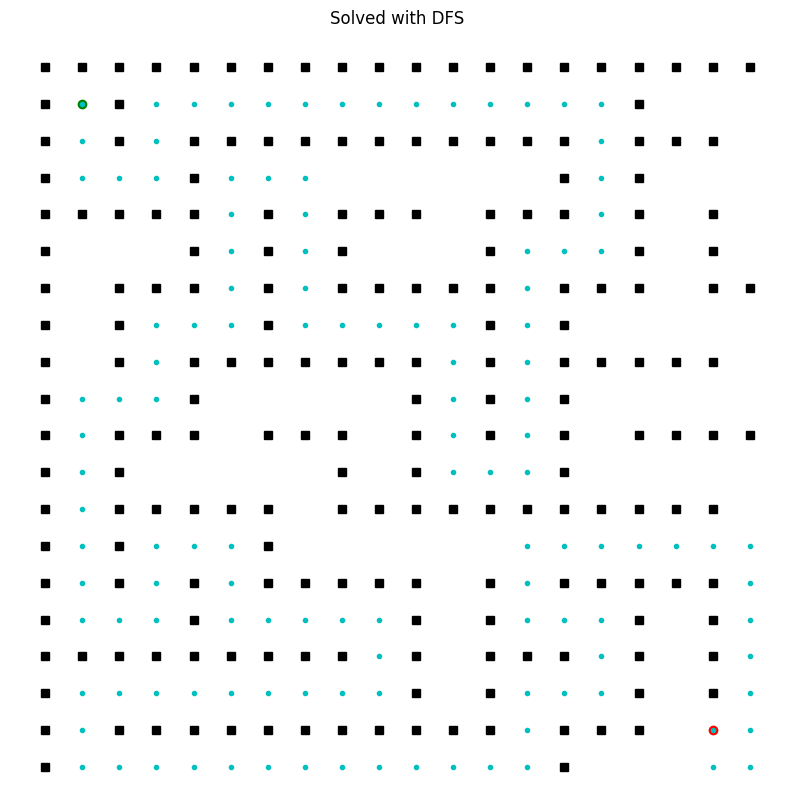

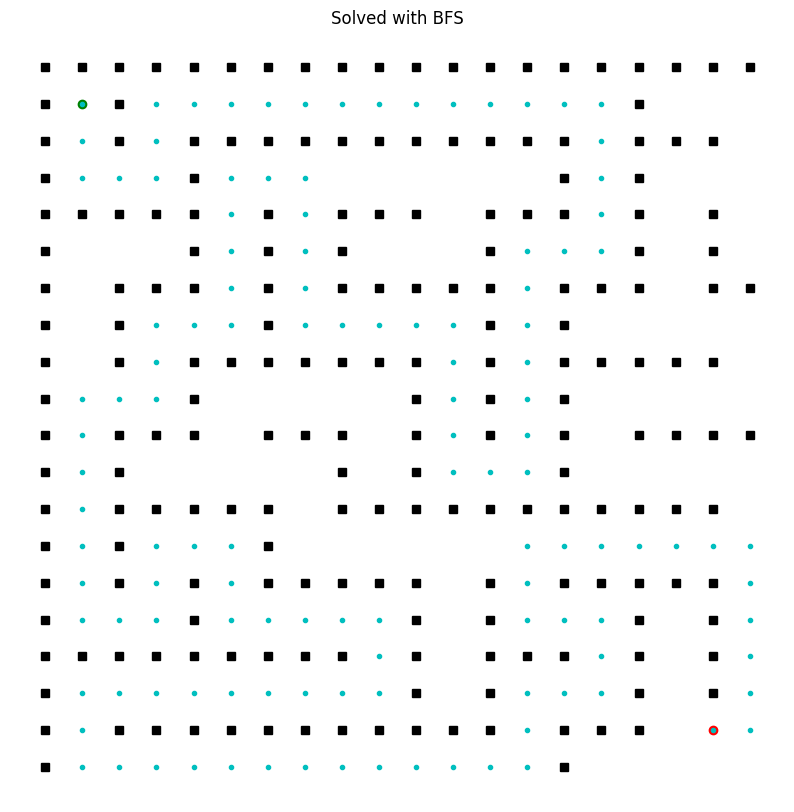

In [13]:
import random
import matplotlib.pyplot as plt
from collections import deque
WIDTH = 20
HEIGHT = 20
DIRS = [(-1, 0), (1, 0), (0, 1), (0, -1)] # N, E, S, W
def generate_maze(width, height):
    maze = [[1] * width for _ in range(height)]
    visited = [[False] * width for _ in range(height)]
    def in_bounds(x, y):
        return 0 <= x < width and 0 <= y < height
    def carve(x, y):
        visited[y][x] = True
        maze[y][x] = 0
        dirs = DIRS[:]
        random.shuffle(dirs)
        for dx, dy in dirs:
            nx, ny = x + dx * 2, y + dy * 2
            if in_bounds(nx, ny) and not visited[ny][nx]:
                maze[y + dy][x + dx] = 0
                carve(nx, ny)
    carve(1, 1)
    maze[1][1] = 'S' # Start
    maze[HEIGHT - 2][WIDTH - 2] = 'E' # End
    return maze
def visualize_maze(maze, path=None, title='Maze'):
    plt.figure(figsize=(10, 10))
    for y in range(len(maze)):
        for x in range(len(maze[0])):
            cell = maze[y][x]
            if cell == 1:
                plt.plot(x, -y, 'ks') 
            elif cell == 'S':
                plt.plot(x, -y, 'go')
            elif cell == 'E':
                plt.plot(x, -y, 'ro')
    if path:
        for x, y in path:
            plt.plot(x, -y, 'c.')
    plt.title(title)
    plt.axis('off')
    plt.show()
def find_start_end(maze):
    for y in range(len(maze)):
        for x in range(len(maze[0])):
            if maze[y][x] == 'S':
                start = (x, y)
            elif maze[y][x] == 'E':
                end = (x, y)
    return start, end
def solve_dfs(maze):
    start, end = find_start_end(maze)
    stack = [((start), [start])]
    visited = set()
    while stack:
        (x, y), path = stack.pop()
        if (x, y) == end:
            return path
        visited.add((x, y))
        for dx, dy in DIRS:
            nx, ny = x + dx, y + dy
            if (0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and
                maze[ny][nx] != 1 and (nx, ny) not in visited):
                stack.append(((nx, ny), path + [(nx, ny)]))
    return None
def solve_bfs(maze):
    start, end = find_start_end(maze)
    queue = deque([((start), [start])]) # (current_coords, path_taken)
    visited = set()
    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == end:
            return path
        visited.add((x, y))
        for dx, dy in DIRS:
            nx, ny = x + dx, y + dy
            if (0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and
                maze[ny][nx] != 1 and (nx, ny) not in visited):
                queue.append(((nx, ny), path + [(nx, ny)]))
    return None
maze = generate_maze(WIDTH, HEIGHT)
visualize_maze(maze, title="Generated Maze")
dfs_path = solve_dfs(maze)
visualize_maze(maze, dfs_path, title="Solved with DFS")
bfs_path = solve_bfs(maze)
visualize_maze(maze, bfs_path, title="Solved with BFS")